# WeatherPy

---


In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate Random Geographic Coordinates and a List of Cities


In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Empty list for latitude and longitude
used_lat_lngs = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities and used_lat_lngs list
    if city not in cities:
        cities.append(city)
        used_lat_lngs.append(lat_lng)
        

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # getting lat and lng from each city
    lat = used_lat_lngs[i][0]
    lng = used_lat_lngs[i][1]
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"?lat={lat}&lon={lng}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    r = requests.get(city_url)
    w = r.json()

    try:
        # Parse the JSON and retrieve data
        city_weather = w["weather"][0]["main"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = w["coord"]["lat"]
        city_lng = w["coord"]["lon"]
        city_max_temp = w["main"]["temp_max"]
        city_humidity = w["main"]["humidity"]
        city_clouds = w["clouds"]["all"]
        city_wind = w["wind"]["speed"]
        city_country = w["sys"]["country"]
        city_date = w["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          356
Lat           356
Lng           356
Max Temp      356
Humidity      356
Cloudiness    356
Wind Speed    356
Country       356
Date          356
dtype: int64

<font size = 6>__Weather data from different cities on 8/1/2023__</font>

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,poli,8.6768,13.0227,305.98,12,69,3.14,CM,1673192004
1,bolungarvik,66.7149,-24.0972,271.89,82,100,21.27,IS,1673192008
2,punta arenas,-53.9657,-71.6869,286.86,67,100,2.24,CL,1673192011
3,severomuysk,55.7325,113.8408,246.97,93,54,1.71,RU,1673192013
4,baherden,39.7182,57.8426,275.27,43,100,4.60,TM,1673192017


In [ ]:

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
# change kelvin to celsius by -273
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,poli,8.6768,13.0227,32.98,12,69,3.14,CM,1673192004
1,bolungarvik,66.7149,-24.0972,-1.11,82,100,21.27,IS,1673192008
2,punta arenas,-53.9657,-71.6869,13.86,67,100,2.24,CL,1673192011
3,severomuysk,55.7325,113.8408,-26.03,93,54,1.71,RU,1673192013
4,baherden,39.7182,57.8426,2.27,43,100,4.60,TM,1673192017


---
<font size = 6>__Scatter Plots__</font>

#### Latitude Vs. Temperature

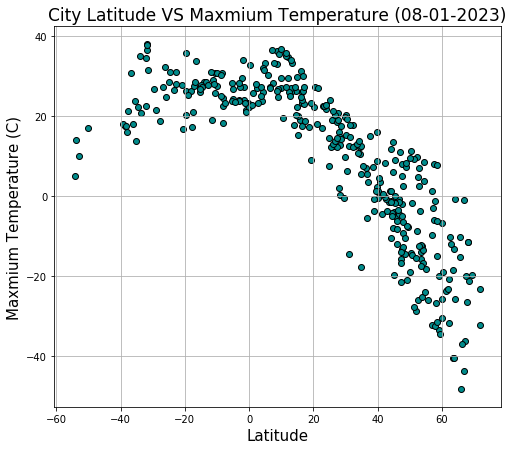

In [5]:
# Build scatter plot for latitude vs. temperature
# plt.figure control the size of the figure but need to put in the first
plt.figure(figsize=(8, 7))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker= "o", color= "darkcyan", edgecolors= "black")

plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Maxmium Temperature (C)", fontsize=15)
plt.title("City Latitude VS Maxmium Temperature (08-01-2023)", fontsize=17)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

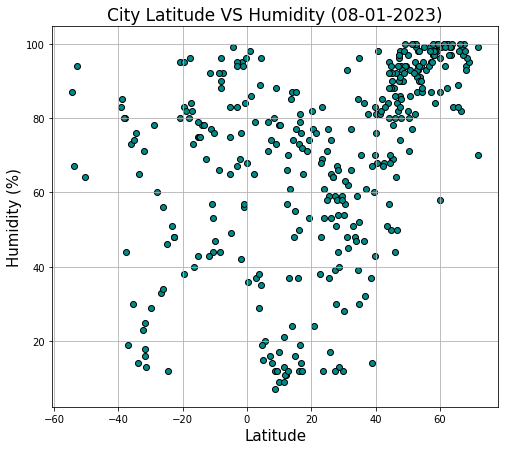

In [6]:
# Build the scatter plots for latitude vs. humidity
# plt.figure control the size of the figure but need to put in the first
plt.figure(figsize=(8, 7))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker= "o", color= "darkcyan", edgecolors= "black")

plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Humidity (%)", fontsize=15)
plt.title("City Latitude VS Humidity (08-01-2023)", fontsize=17)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

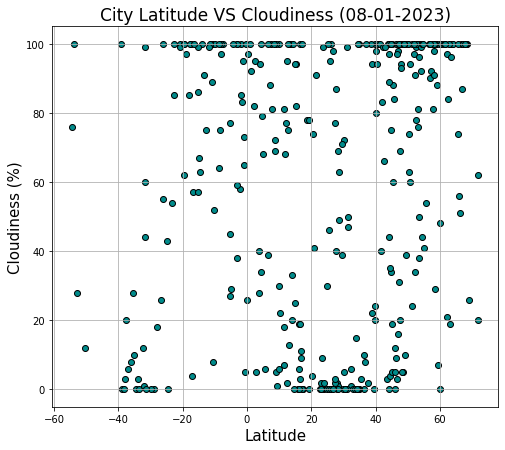

In [7]:
# Build the scatter plots for latitude vs. cloudiness
# plt.figure control the size of the figure but need to put in the first
plt.figure(figsize=(8, 7))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker= "o", color= "darkcyan", edgecolors= "black")

plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Cloudiness (%)", fontsize=15)
plt.title("City Latitude VS Cloudiness (08-01-2023)", fontsize=17)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

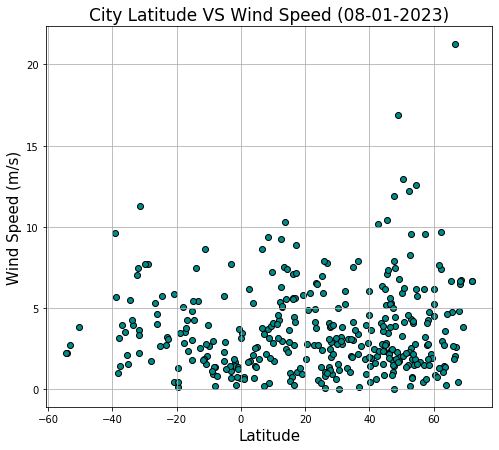

In [8]:
# Build the scatter plots for latitude vs. wind speed
# plt.figure control the size of the figure but need to put in the first
plt.figure(figsize=(8, 7))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker= "o", color= "darkcyan", edgecolors= "black")

plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Wind Speed (m/s)", fontsize=15)
plt.title("City Latitude VS Wind Speed (08-01-2023)", fontsize=17)
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

<font size = 6>__Linear Regression__</font>


In [16]:
# Define a function to create Linear Regression plots
def linear_regression(x_axis, y_axis, x_start, x_end, x_axis_equ, y_axis_equ):
    slope, constant= np.polyfit(x_axis, y_axis, deg = 1)

    # create a line from x-axis 15 to 25 with 2 point
    x_num = np.linspace(x_start, x_end, num=2)
    plt.plot(x_num, constant + slope * x_num, color="black", linewidth= 2.5)
    plt.text(x_axis_equ, y_axis_equ, f"y = {slope:.2f} * x + {constant:.2f}", fontsize= 14)


In [11]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0 ,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,poli,8.6768,13.0227,32.98,12,69,3.14,CM,1673192004
1,bolungarvik,66.7149,-24.0972,-1.11,82,100,21.27,IS,1673192008
3,severomuysk,55.7325,113.8408,-26.03,93,54,1.71,RU,1673192013
4,baherden,39.7182,57.8426,2.27,43,100,4.60,TM,1673192017
5,svetlogorsk,66.7465,89.5949,-43.88,99,87,2.08,RU,1673192019


In [12]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0 ,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,punta arenas,-53.9657,-71.6869,13.86,67,100,2.24,CL,1673192011
12,ushuaia,-53.0241,-66.2848,10.03,94,28,2.74,AR,1673192072
13,dianopolis,-10.7086,-47.0785,30.73,53,100,1.58,BR,1673192073
16,satipo,-10.6233,-74.2165,25.70,44,8,2.08,PE,1673192082
22,urucara,-1.8093,-57.4648,33.91,42,85,1.68,BR,1673192093


##  Temperature vs. Latitude 
---
### Northern Hemishpere

p-value = 1.504979743901869e-89,
 r = -0.8826979353518621


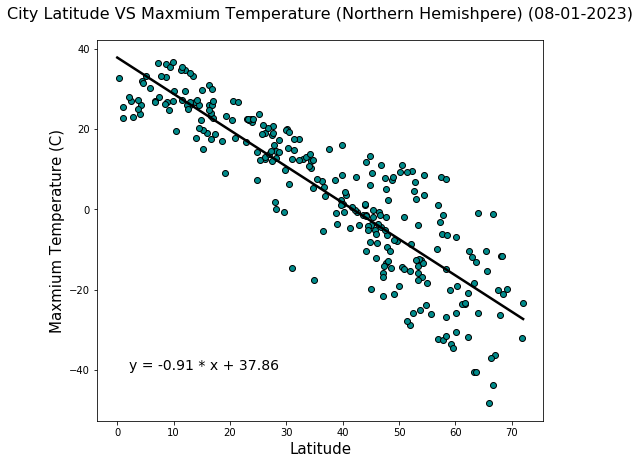

In [93]:
# graph for Lat VS max temp in northern hemi
plt.figure(figsize=(8, 7))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker= "o", color= "darkcyan", edgecolors= "black")

plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Maxmium Temperature (C)", fontsize=15)
plt.title("City Latitude VS Maxmium Temperature (Northern Hemishpere) (08-01-2023)", fontsize=16, y = 1.04)

# using the linear regression def to draw the line and putting the equation on the graph
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 0, 72, 2, -40)

# calulating the p-value and correlation
r_temp_nor = st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
print(f"p-value = {r_temp_nor[1]},\n r = {r_temp_nor[0]}")

### Southern Hemishpere

p-value = 0.0028351425149087265,
 r = 0.31634654780868865


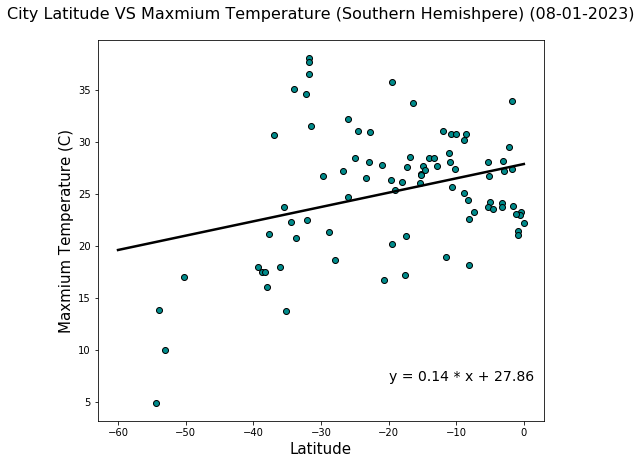

In [94]:
# graph for Lat VS max temp in Southern Hemisphere
plt.figure(figsize=(8, 7))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker= "o", color= "darkcyan", edgecolors= "black")

plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Maxmium Temperature (C)", fontsize=15)
plt.title("City Latitude VS Maxmium Temperature (Southern Hemishpere) (08-01-2023)", fontsize=16, y = 1.04)

# using the linear regression def to draw the line and putting the equation on the graph
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], -60, 0, -20, 7)

# calulate the r and p-value 
r_temp_sou = st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
print(f"p-value = {r_temp_sou[1]},\n r = {r_temp_sou[0]}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

## Humidity vs. Latitude
---
### Northern Hemishpere

p-value = 2.80065928150103e-34,
 r = 0.6544835717272041


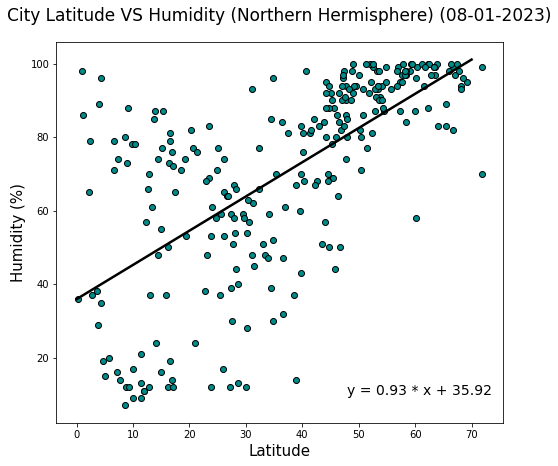

In [95]:
# Build the scatter plots for latitude vs. humidity in Northern Hemishpere
plt.figure(figsize=(8, 7))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker= "o", color= "darkcyan", edgecolors= "black")

plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Humidity (%)", fontsize=15)
plt.title("City Latitude VS Humidity (Northern Hermisphere) (08-01-2023)", fontsize=17, y = 1.04)

# using the linear regression def to draw the line and putting the equation on the graph
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 0, 70, 48, 10)

# calulate the r and p-value 
r_hum_nor = st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
print(f"p-value = {r_hum_nor[1]},\n r = {r_hum_nor[0]}")

### Southern Hemisphere

p-value = 0.008725121982637887,
 r = 0.27958931055119646


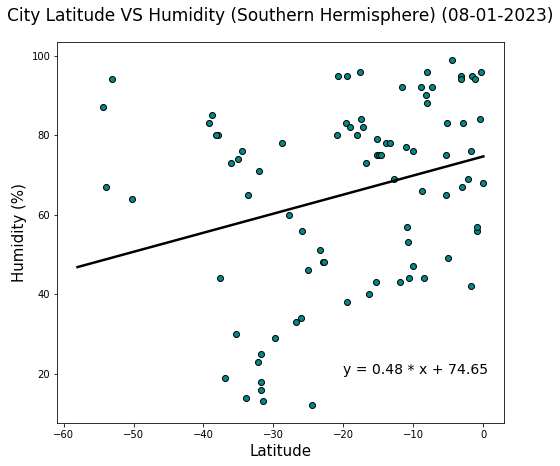

In [96]:
# Build the scatter plots for latitude vs. humidity in Southern Hemishpere
plt.figure(figsize=(8, 7))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker= "o", color= "darkcyan", edgecolors= "black")

plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Humidity (%)", fontsize=15)
plt.title("City Latitude VS Humidity (Southern Hermisphere) (08-01-2023)", fontsize=17, y = 1.04)

# using the linear regression def to draw the line and putting the equation on the graph
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], -58, 0, -20, 20)

# calulate the r and p-value 
r_hum_sou = st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
print(f"p-value = {r_hum_sou[1]},\n r = {r_hum_sou[0]}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

## Cloudiness vs. Latitude
---
### Northern Hemishpere

p-value = 3.827536706192496e-06,
 r = 0.2774602691273425


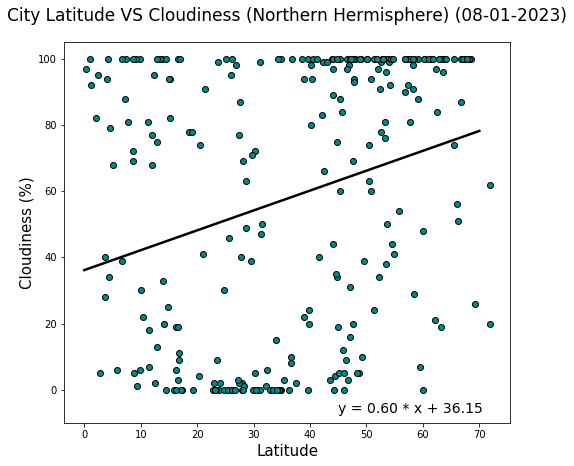

In [97]:
# Build the scatter plots for latitude vs. Cloudiness in Southern Hemishpere
plt.figure(figsize=(8, 7))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker= "o", color= "darkcyan", edgecolors= "black")

plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Cloudiness (%)", fontsize=15)
plt.ylim(-10,105)
plt.title("City Latitude VS Cloudiness (Northern Hermisphere) (08-01-2023)", fontsize=17, y = 1.04)

# using the linear regression def to draw the line and putting the equation on the graph
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 0, 70, 45, -7)

# calulate the r and p-value 
r_cloud_nor = st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
print(f"p-value = {r_cloud_nor[1]},\n r = {r_cloud_nor[0]}")

p-value = 2.2658905124547475e-05,
 r = 0.43746381220290953


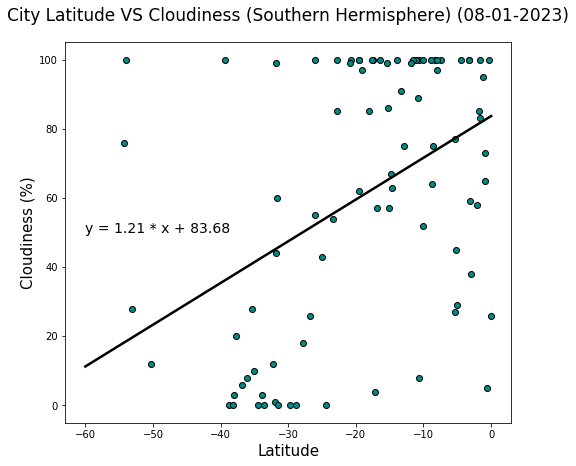

In [98]:
# Build the scatter plots for latitude vs. Cloudiness in Southern Hemishpere
plt.figure(figsize=(8, 7))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker= "o", color= "darkcyan", edgecolors= "black")

plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Cloudiness (%)", fontsize=15)
plt.title("City Latitude VS Cloudiness (Southern Hermisphere) (08-01-2023)", fontsize=17, y = 1.04)

# using the linear regression def to draw the line and putting the equation on the graph
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], -60, 0, -60, 50)

# calulate the r and p-value 
r_cloud_sou = st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
print(f"p-value = {r_cloud_sou[1]},\n r = {r_cloud_sou[0]}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

## Wind Speed vs. Latitude
---
### Northern Hemishpere

p-value = 0.15131942463949893,
 r = 0.08772634862101181


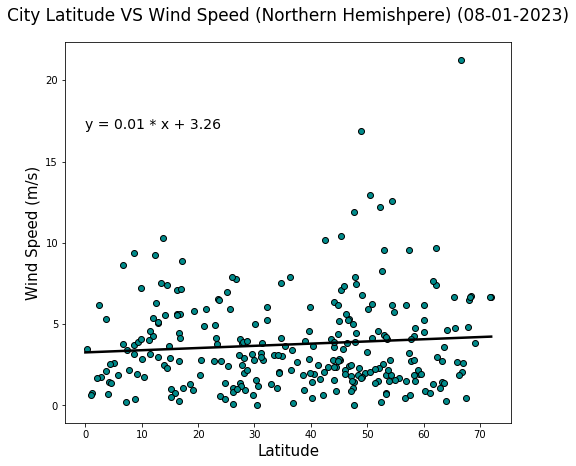

In [99]:
# Build the scatter plots for latitude vs. Wind Speed in Northern Hemishpere
plt.figure(figsize=(8, 7))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker= "o", color= "darkcyan", edgecolors= "black")

plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Wind Speed (m/s)", fontsize=15)
plt.title("City Latitude VS Wind Speed (Northern Hemishpere) (08-01-2023)", fontsize=17, y = 1.04)

# using the linear regression def to draw the line and putting the equation on the graph
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 0, 72, 0, 17)

# calulate the r and p-value 
r_wind_nor = st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
print(f"p-value = {r_wind_nor[1]},\n r = {r_wind_nor[0]}")

### Southern Hemishpere

p-value = 0.004142247415406137,
 r = -0.304458014667245


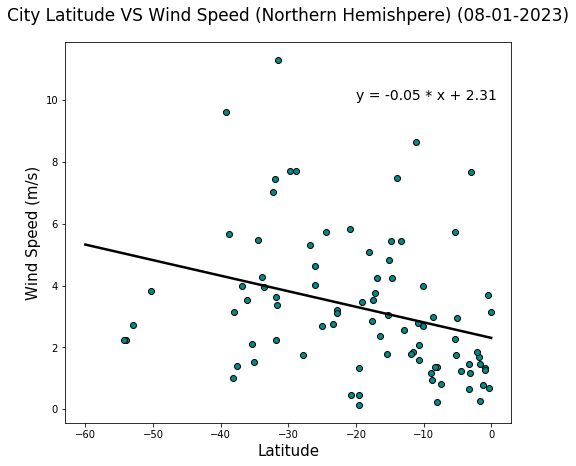

In [100]:
# Build the scatter plots for latitude vs. Wind Speed in Southern Hemishpere
plt.figure(figsize=(8, 7))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker= "o", color= "darkcyan", edgecolors= "black")

plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Wind Speed (m/s)", fontsize=15)
plt.title("City Latitude VS Wind Speed (Northern Hemishpere) (08-01-2023)", fontsize=17, y = 1.04)

# using the linear regression def to draw the line and putting the equation on the graph
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], -60, 0, -20, 10)

# calulate the r and p-value 
r_wind_sou = st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
print(f"p-value = {r_wind_sou[1]},\n r = {r_wind_sou[0]}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE